In [1]:
import os

In [2]:
def function1(input1):
    return input1 + "from first function"

def function2(input2):
    return input2 + " and savita from second function"

In [3]:

# show this later on
def function3(input3):
    return input3

In [4]:
# show this later on
def function1(input1):
    return input1 + "from first function"

def function2(input2):
    output=function3("this is function 2 in between")
    return input2 + " " + output + " and savita from second function"

In [5]:

function1("sunny")

'sunnyfrom first function'

In [6]:

function2("savita")

'savita this is function 2 in between and savita from second function'

In [7]:
function1("sunny")+ " "+function2("savita")

'sunnyfrom first function savita this is function 2 in between and savita from second function'

In [8]:
from langgraph.graph import Graph

In [9]:

#this is called a simple graph
#we have one more type of graph that is called stategraph
workflow1=Graph()

In [10]:
workflow1.add_node("function1", function1)

In [11]:
workflow1.add_node("function2",function2)

In [12]:
workflow1.add_edge("function1","function2")

In [13]:

workflow1.set_entry_point("function1")

In [14]:

workflow1.set_finish_point("function2")

In [15]:
app1=workflow1.compile()

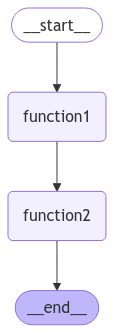

In [16]:

from IPython.display import Image, display

try:
    display(Image(app1.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [17]:
app1.invoke("hi this is sunny ")

'hi this is sunny from first function this is function 2 in between and savita from second function'

In [18]:

input = "hi this is sunny "

In [19]:

for output in app1.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from function1
_______
hi this is sunny from first function


here is output from function2
_______
hi this is sunny from first function this is function 2 in between and savita from second function




###now explain the intermediate function
####then come to the next workflow
#from here phase-2
###Now let's create a workflow with LLM

In [20]:
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="llama3-groq-70b-8192-tool-use-preview")
llm.invoke("hi").content

'Hi! How can I assist you today?'

In [21]:
from langchain.embeddings import HuggingFaceBgeEmbeddings

model_name = "BAAI/bge-base-en-v1.5"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': True} # set True to compute cosine similarity
embeddings = HuggingFaceBgeEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs,
)

c:\Users\91639\Desktop\langgraph_end_to_end\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
def function1(input):
    llm=ChatGroq(model_name="llama3-groq-70b-8192-tool-use-preview")
    response=llm.invoke(input).content
    return response

In [23]:

def function2(input):
    upper_case=input.upper()
    return upper_case

In [24]:
from langgraph.graph import Graph
workflow2=Graph()

In [25]:
workflow2.add_node("llm",function1)

In [26]:
workflow2.add_node("upper_string",function2)

In [27]:
workflow2.add_edge("llm","upper_string")

In [28]:
workflow2.set_entry_point("llm")
workflow2.set_finish_point("upper_string")

In [29]:
app2=workflow2.compile()

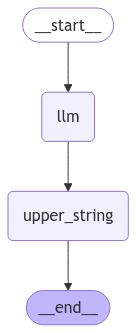

In [30]:

from IPython.display import Image, display

try:
    display(Image(app2.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [31]:
app2.invoke("what is a name of first indian prime minister?")

'THE FIRST PRIME MINISTER OF INDIA WAS JAWAHARLAL NEHRU.'

In [32]:

for output in app2.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from llm
_______
Hi Sunny! How can I assist you today?


here is output from upper_string
_______
HI SUNNY! HOW CAN I ASSIST YOU TODAY?




###this is a second tool which you will create in the end of this phase
###Now lets create our output token counter

In [33]:

def function3(input):
    token=input.split()
    token_number=len(token)
    token_number=f"total token number is {token_number}"
    return token_number

In [34]:
workflow3=Graph()
workflow3.add_node("llm",function1)
workflow3.add_node("token_counter",function3)
workflow3.add_edge("llm","token_counter")
workflow3.set_entry_point("llm")
workflow3.set_finish_point("token_counter")
app3=workflow3.compile()

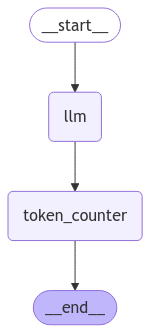

In [35]:

from IPython.display import Image, display

try:
    display(Image(app3.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [36]:
app3.invoke("what is a name of first indian prime minister?")

'total token number is 9'

In [38]:
input="what is AI in detailed?"

In [41]:

for output in app3.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from llm
_______
Artificial Intelligence (AI) refers to the development of computer systems that can perform tasks that typically require human intelligence. These tasks include learning, problem-solving, decision-making, perception, and understanding language. AI systems are designed to analyze data, learn from it, and make predictions or decisions based on that analysis.

There are several key concepts and techniques used in AI research:

1. Machine Learning: This is a type of AI that allows systems to learn from data without being explicitly programmed. Machine learning algorithms can be used for tasks such as image recognition, natural language processing, and predictive analytics.

2. Deep Learning: This is a subset of machine learning that uses neural networks, which are inspired by the structure and function of the human brain. Deep learning algorithms have been successful in tasks such as speech recognition, image recognition, and natural language processing.

3.